In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv('drive/Shareddrives/DS340W Project/PopularityPrediction-main/INSTAGRAM FILES/merged_file_insta.csv')

In [ ]:
to_drop = ['image_id', 'Account', 'User Name', 'Post Created', 'Post Created Date', 'Post Created Time', 'Type', 'Likes', 'Comments', 'Views', 'Like and View Counts Disabled', 'URL', 'Link', 'Photo', 'Title', 'Sponsor Id', 'Sponsor Name', 'Overperforming Score'  ]


df = df.drop(to_drop, axis=1)
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,True,True,True,False,1,False,False,False,False,cyan,...,46,HIGH,0,0,0,0,0,1,0,0
1,False,True,True,True,2,False,False,False,False,green,...,31,HIGH,0,0,0,0,0,1,0,0
2,False,True,True,False,1,False,False,False,False,grey,...,34,HIGH,0,1,0,0,0,0,0,0
3,True,True,True,False,1,False,False,False,True,grey,...,44,HIGH,0,1,0,0,0,0,0,0
4,True,True,False,True,1,False,False,False,False,cyan,...,58,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,True,True,True,True,2,False,False,False,False,brown,...,22,HIGH,0,1,0,0,0,1,0,0
1550,True,True,True,True,2,False,False,False,False,grey,...,103,HIGH,0,0,0,0,0,1,0,0
1551,False,True,True,True,2,True,False,False,False,grey,...,38,HIGH,0,1,0,0,1,1,0,0
1552,True,True,True,True,2,False,False,False,False,brown,...,52,HIGH,0,1,0,0,0,1,1,0


In [ ]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [ ]:
df = change_types(df)

In [ ]:
df.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
dominantColor,object


In [ ]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,0.7,3503589.1,10583.8,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,3881097.4,17427.2,0.1,0.4,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24423.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1274288.0,2576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,7626483.2,17840.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9314330.0,283074.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


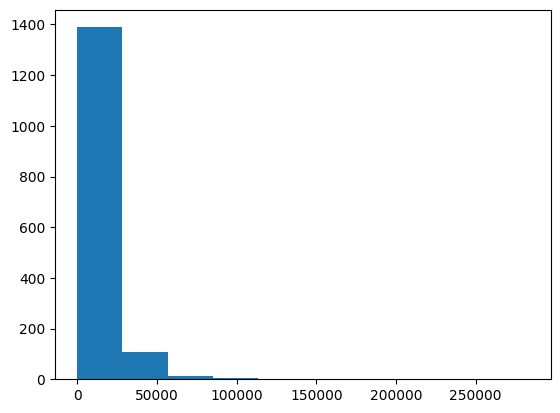

In [ ]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [ ]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [ ]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,0.6,3005291.2,6764.7,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.2,0.5,3762862.8,8527.6,0.1,0.4,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24344.5,87.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,330523.5,1627.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,7367298.5,14687.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9314330.0,27045.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df[df['Total Interactions']>100000].count()

,0
Child,5
Smile,5
Female,5
Male,5
PeopleNumber,5
Text,5
close_up,5
Indoors,5
Outdoors,5
dominantColor,5


In [ ]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

,0
0,4.593569
1,3.093195
2,3.393552
3,4.390779
4,5.781499
...,...
1549,4.531411
1550,21.638655
1551,7.973143
1552,10.924370


<ipython-input-130-8733ca3f5b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


,0
count,1368.000000
mean,3.975115
std,5.105046
min,0.422789
25%,2.081844
50%,2.815274
75%,4.136985
max,139.164638


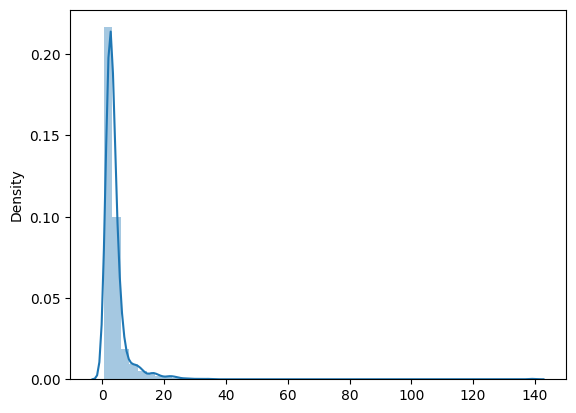

In [ ]:
sns.distplot(y)
y.describe()

In [ ]:
y[y<y.mean()].count()

1004

In [ ]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,0,0,0,0,green,1,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,1,grey,1,HIGH,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,brown,0,HIGH,0,1,0,0,0,1,0,0
1550,1,1,1,1,2,0,0,0,0,grey,0,HIGH,0,0,0,0,0,1,0,0
1551,0,1,1,1,2,1,0,0,0,grey,0,HIGH,0,1,0,0,1,1,0,0
1552,1,1,1,1,2,0,0,0,0,brown,0,HIGH,0,1,0,0,0,1,1,0


In [ ]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
1,0,1,1,1,2,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
2,0,1,1,0,1,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False
3,1,1,1,0,1,0,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False
4,1,1,0,1,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1550,1,1,1,1,2,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1551,0,1,1,1,2,1,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1552,1,1,1,1,2,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# y = (y - y.min())/(y.max() - y.min())

In [ ]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [ ]:
X = change_types(X)
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,int64


In [ ]:
y_new = []

for i in y:
    if i<y.mean():
        y_new.append('0')
    else:
        y_new.append('1')

In [ ]:
print(y_new.count('0'))
print(y_new.count('1'))

1004
364


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42, stratify=y_new)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7773722627737226

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y_new, cv=5) # cv -->
scores.mean()

0.734031175637015

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
# print(metrics.f1_score(y_test, y_pred, labels=['low', 'high']))
print(metrics.confusion_matrix(y_test, y_pred))

[[166  35]
 [ 17  56]]


In [ ]:
scores = cross_val_score(clf, X, y_new, cv=10)
scores.mean()

0.7816874194933447

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.7664233576642335

In [ ]:
scores = cross_val_score(neigh, X, y_new, cv=10) # cv -->
scores.mean()

0.6923357664233577

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7992700729927007

In [ ]:
scores = cross_val_score(svc, X, y_new, cv=10)
scores.mean()

0.8014544869042508

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7992700729927007

In [ ]:
scores = cross_val_score(lr, X, y_new, cv=10) # cv -->
scores.mean()

0.771441605839416

In [ ]:
for imp, name in zip(clf.feature_importances_, clf.feature_names_in_):
    print(name, imp)

Child 0.025090328906088512
Smile 0.02668501397315634
Female 0.0
Male 0.0
PeopleNumber 0.021721231431896953
Text 0.0
close_up 0.0
Indoors 0.0
Outdoors 0.0
LOGO 0.27034432383611107
ANGRY 0.026600620104612067
CALM 0.2177885260832321
CONFUSED 0.0
DISGUSTED 0.0
FEAR 0.03072710011540156
HAPPY 0.019726986582139276
SAD 0.019186835302682843
SURPRISED 0.0
dominantColor_blue 0.020354815898554333
dominantColor_brown 0.021841514955399353
dominantColor_cyan 0.01789030477919872
dominantColor_green 0.0
dominantColor_grey 0.0
dominantColor_orange 0.0
dominantColor_pink 0.13430004299055417
dominantColor_purple 0.13202688318784486
dominantColor_red 0.0
dominantColor_white 0.0
dominantColor_yellow 0.0
Contrast_HIGH 0.0
Contrast_LOW 0.01571547185312788


In [ ]:
# Sorted feature importances
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

,0
LOGO,0.270344
CALM,0.217789
dominantColor_pink,0.134300
dominantColor_purple,0.132027
FEAR,0.030727
Smile,0.026685
ANGRY,0.026601
Child,0.025090
dominantColor_brown,0.021842
PeopleNumber,0.021721


## Balance dataset

In [ ]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [ ]:
X['Targets']=y_new

In [ ]:
X = downsample(X, 'Targets')
y_new = X['Targets']

<ipython-input-152-bc8664726690>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(nmin))


In [ ]:
X = X.drop('Targets', axis=1)

In [ ]:
X.shape

(728, 31)

In [ ]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,0,1,2,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0,1,2,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
724,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
725,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
726,0,1,1,1,2,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42)

In [ ]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.6917808219178082
[[52 29]
 [16 49]]


In [ ]:
scores = cross_val_score(clf, X, y_new, cv=5)
print(scores)
scores.mean()

[0.79452055 0.75342466 0.76027397 0.75862069 0.71724138]


0.7568162494095418

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.7808219178082192
[[61 20]
 [12 53]]


In [ ]:
scores = cross_val_score(clf, X, y_new, cv=5)
scores.mean()

0.7829192253188474

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.6232876712328768

In [ ]:
scores = cross_val_score(neigh, X, y_new, cv=5)
scores.mean()

0.6317524799244214

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7808219178082192

In [ ]:
scores = cross_val_score(lr, X, y_new, cv=5)
scores.mean()

0.780207841284837

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7808219178082192

In [ ]:
scores = cross_val_score(svc, X, y_new, cv=5)
scores.mean()

0.7856683986773737

In [ ]:
svc = SVC(gamma='auto', kernel='linear', C=0.5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7808219178082192

In [ ]:
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

,0
LOGO,0.256819
dominantColor_purple,0.142316
dominantColor_yellow,0.082866
dominantColor_blue,0.081425
Indoors,0.068551
CONFUSED,0.062806
dominantColor_green,0.051518
DISGUSTED,0.048820
CALM,0.039398
PeopleNumber,0.039078


## Oversampling

In [ ]:
# Oversampling
indices = [i for i, x in enumerate(y_new) if x == "1"]
missing = 1174
high_df = pd.DataFrame(columns=new_df.columns)
for i in range(missing):
    i = random.choice(indices)
    ap = new_df.iloc[i]
    high_df = pd.concat([high_df, ap.to_frame().T], ignore_index=True)
high_df.reset_index(drop=True)

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,0,0,0,0,0,1,0,0,0,green,...,1957,LOW,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,blue,...,449,HIGH,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,green,...,1516,HIGH,0,0,0,0,0,0,0,0
3,1,1,1,0,2,0,0,0,0,cyan,...,94,HIGH,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,green,...,376,HIGH,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,0,1,1,0,1,0,0,0,0,grey,...,166,HIGH,0,0,0,0,0,0,0,0
1170,0,1,1,0,1,0,0,0,1,grey,...,1652,HIGH,0,1,0,0,0,0,0,0
1171,0,0,0,0,0,1,0,0,0,green,...,447,HIGH,0,0,0,0,0,0,0,0
1172,1,1,1,1,2,0,0,0,0,grey,...,94,HIGH,0,1,0,0,0,0,0,0


In [ ]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')

    df['LOGO'] = df['LOGO'].astype('bool')
    df['ANGRY'] = df['ANGRY'].astype('bool')
    df['CALM'] = df['CALM'].astype('bool')
    df['CONFUSED'] = df['CONFUSED'].astype('bool')
    df['DISGUSTED'] = df['DISGUSTED'].astype('bool')
    df['FEAR'] = df['FEAR'].astype('bool')
    df['HAPPY'] = df['HAPPY'].astype('bool')
    df['SAD'] = df['SAD'].astype('bool')
    df['SURPRISED'] = df['SURPRISED'].astype('bool')
    return df

In [ ]:
upsampled = pd.concat([new_df, high_df], ignore_index=True)
upsampled = upsampled.sample(frac=1).reset_index(drop=True)
upsampled = change_types(upsampled)

In [ ]:
y = upsampled['Total Interactions']
y = (y/upsampled['Followers at Posting'])*1000
y

,0
0,1.72952
1,1.668401
2,2.216509
3,3.786799
4,5.477785
...,...
2537,6.054856
2538,2.558296
2539,2.815322
2540,6.055613


In [ ]:
X = pd.get_dummies(data=upsampled.drop(['Total Interactions','Followers at Posting'], axis=1))
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,0,0,0,0,1,0,0,0,True,...,False,False,False,False,False,False,False,False,True,False
1,0,1,1,0,1,0,0,0,0,True,...,False,False,False,False,False,False,False,False,True,False
2,0,1,1,0,1,0,0,0,0,True,...,False,False,False,False,False,False,False,False,True,False
3,0,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,False
4,0,1,1,1,2,0,0,0,1,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,0,0,0,0,0,1,0,0,0,True,...,False,False,False,False,False,False,False,False,True,False
2538,0,0,0,0,0,1,0,0,0,True,...,False,False,False,False,False,True,False,False,True,False
2539,0,1,1,0,1,1,0,0,0,False,...,False,True,False,False,False,False,False,False,True,False
2540,1,1,1,0,1,0,0,0,0,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,bool


In [ ]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    X['LOGO'] =X['LOGO'].astype('int64')
    X['ANGRY'] =X['ANGRY'].astype('int64')
    X['CALM'] =X['CALM'].astype('int64')
    X['CONFUSED'] =X['CONFUSED'].astype('int64')
    X['DISGUSTED'] =X['DISGUSTED'].astype('int64')
    X['FEAR'] =X['FEAR'].astype('int64')
    X['HAPPY'] =X['HAPPY'].astype('int64')
    X['SAD'] =X['SAD'].astype('int64')
    X['SURPRISED'] =X['SURPRISED'].astype('int64')
    return X

In [ ]:
X = change_types(X)

In [ ]:
X['Targets']=y_new
X = downsample(X, 'Targets')
y_new = X['Targets']
X = X.drop('Targets', axis=1)

<ipython-input-152-bc8664726690>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(nmin))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42)

In [ ]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.5547945205479452
[[46 35]
 [30 35]]


In [ ]:
scores = cross_val_score(clf, X, y_new, cv=5)
print(scores)
scores.mean()

[0.55479452 0.5        0.55479452 0.53793103 0.49655172]


0.528814359943316

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.5
[[41 40]
 [33 32]]


In [ ]:
scores = cross_val_score(clf, X, y_new, cv=5)
scores.mean()

0.5000566839867737

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.5205479452054794

In [ ]:
scores = cross_val_score(neigh, X, y_new, cv=5)
scores.mean()

0.5370713273500236

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5342465753424658

In [ ]:
scores = cross_val_score(lr, X, y_new, cv=5)
scores.mean()

0.5096457250826641

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.5273972602739726

In [ ]:
scores = cross_val_score(svc, X, y_new, cv=5)
scores.mean()

0.5234010392064242

In [ ]:
svc = SVC(gamma='auto', kernel='linear', C=0.5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.541095890410959